<a href="https://colab.research.google.com/github/AI4ALL-Class8-Group2/offensive-standard-data/blob/google-colab-group/(FINAL)_Apply_AI_Group8_2_Gun_Violence_Incident_Fatality_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**

Gun Violence Incident Fatality Predictor

**Introduction**

This project seeks to determine the fatality of gun violence incidents. The initial dataset comprised of data from 22 Police Departments across the United States.

Dataset - https://github.com/the-trace-and-buzzfeed-news/local-police-data-analysis



**4 PDs Dataset used**
*   Baltimore PD
*   Boston PD
*   Los Angeles PD
*   San Francisco PD

**162,47 rows and 17 columns**

**Data Selection**
1.	All have ‘Non-Fatal Shooting’ and ‘Homicide-Gun’ variables under ‘offence_group’ column except Los Angeles.
2.	Los Angeles has ‘Homicide-Criminal-Fatal-Shooting’ and ‘Agg Assault - Shooting - Non-Fatal’ under ‘offence_category’.

**Fatal** means ‘Homicide-Gun’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Homicide-Criminal-Fatal-Shooting’ (as recorded Los Angeles PD)

**Non-Fatal** means ‘‘Non-Fatal Shooting’ (as recorded by Baltimore PD, Boston PD, Newark PD, San Francisco PD) and ‘Agg Assault - Shooting - Non-Fatal’ (as recorded by Los Angeles PD)

**N0TE** Research started with 5 PDs but Newark-PD was dropped after further analysis

In [41]:
#import library and load dataset
import pandas as pd
data = pd.read_csv(r'https://raw.githubusercontent.com/AI4ALL-Class8-Group2/offensive-standard-data/main/offenses_5pd_fatality.csv')


# show the first 5 rows of the data
data.head()

<ipython-input-41-27649a4ab19f>:3: DtypeWarning: Columns (14,16,19,22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'https://raw.githubusercontent.com/AI4ALL-Class8-Group2/offensive-standard-data/main/offenses_5pd_fatality.csv')


,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,...,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date,Fatality Status
0,MDBPD0000-C419771020-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0351,7/26/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
1,MDBPD0000-B63BECA76C-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17H0198,7/26/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,FEMALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
2,MDBPD0000-8A7079014F-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0349,7/25/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
3,MDBPD0000-3EF6B5EBEF-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0348,7/25/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal
4,MDBPD0000-5995BFA411-01-01,BALTIMORE-MAIN,BALTIMORE-PD,MDBPD0000,17V0346,7/24/2017,NaN,NON FATAL SHOOTING,NaN,NON FATAL SHOOTING,...,NaN,BLACK/HISPANIC,MALE,OPEN,NaN,OPEN,Open & No Arrest-Unspecified,NaN,NaN,Non-Fatal


In [42]:
# show number of rows and columns
print(data.shape)

(18616, 32)


In [43]:
# show data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row_hash                  18616 non-null  object 
 1   source                    18616 non-null  object 
 2   agency_name               18616 non-null  object 
 3   agency_ori                18616 non-null  object 
 4   agency_incident_id        18616 non-null  object 
 5   occurred_date             18610 non-null  object 
 6   occurred_time             13433 non-null  object 
 7   offense_category          18616 non-null  object 
 8   top_ucr_classification    9748 non-null   object 
 9   top_local_classification  14640 non-null  object 
 10  nibrs_code                0 non-null      float64
 11  weapon                    16223 non-null  object 
 12  firearm_ind               18616 non-null  object 
 13  offense_group             18616 non-null  object 
 14  domest

In [44]:
# show feature names
print(data.keys())

Index(['row_hash', 'source', 'agency_name', 'agency_ori', 'agency_incident_id',
       'occurred_date', 'occurred_time', 'offense_category',
       'top_ucr_classification', 'top_local_classification', 'nibrs_code',
       'weapon', 'firearm_ind', 'offense_group', 'domestic_violence_ind',
       'family_violence_ind', 'gang_activity_ind', 'relationship_to_offender',
       'circumstance', 'inside_outside', 'victim_age', 'victim_race',
       'victim_ethnicity', 'victim_race_condensed', 'victim_sex',
       'case_status', 'arrest_ind', 'clearance_status', 'clearance_group',
       'clearance_date', 'arrest_date', 'Fatality Status'],
      dtype='object')


In [45]:
# delete rows with missing values
print(data.shape)
print(data.dropna().shape)

(18616, 32)
(0, 32)


In [46]:
# duplicate rows
data[data.duplicated(keep=False)]

,row_hash,source,agency_name,agency_ori,agency_incident_id,occurred_date,occurred_time,offense_category,top_ucr_classification,top_local_classification,...,victim_ethnicity,victim_race_condensed,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,clearance_date,arrest_date,Fatality Status


In [47]:
# drop duplicate rows
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(18616, 32)
(18616, 32)


In [48]:
# replace "m" with "male"
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'MALE' if n_group == 'M' else n_group)
data['victim_sex'].value_counts()

victim_sex
MALE             15401
F                 1255
FEMALE             486
OTH                 24
X                   14
UNCLEAR              4
U                    3
TRANSGENDERED        1
Name: count, dtype: int64

In [49]:
# replace "f" with "female"
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'FEMALE' if n_group == 'F' else n_group)
data['victim_sex'].value_counts()


victim_sex
MALE             15401
FEMALE            1741
OTH                 24
X                   14
UNCLEAR              4
U                    3
TRANSGENDERED        1
Name: count, dtype: int64

In [50]:
# consolidate other categories into "other"
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'OTHER' if n_group == 'OTH' else n_group)
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'OTHER' if n_group == 'X' else n_group)
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'OTHER' if n_group == 'UNCLEAR' else n_group)
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'OTHER' if n_group == 'U' else n_group)
data['victim_sex'] = data['victim_sex']\
    .apply(lambda n_group: 'OTHER' if n_group == 'TRANSGENDERED' else n_group)
data['victim_sex'].value_counts()

victim_sex
MALE      15401
FEMALE     1741
OTHER        46
Name: count, dtype: int64

<Axes: ylabel='count'>

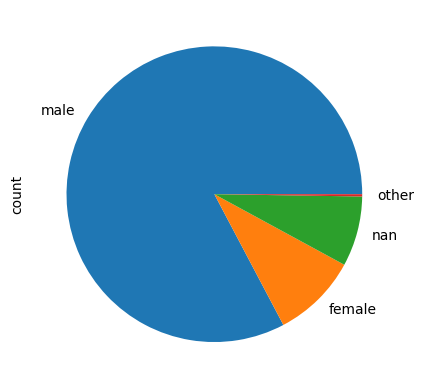

In [51]:
# pie chart for victim_sex
data['victim_sex'].str.lower().value_counts(dropna=False).plot.pie()

In [52]:
#delete  columns not relevant to research
data = data.drop(data.columns[[0,1,3,4,8,9,10,12,22]], axis=1)
# missing values
print(data.isnull().sum())

agency_name                     0
occurred_date                   6
occurred_time                5183
offense_category                0
weapon                       2393
offense_group                   0
domestic_violence_ind       16821
family_violence_ind         18616
gang_activity_ind            8554
relationship_to_offender    18616
circumstance                17879
inside_outside              16827
victim_age                   1598
victim_race                  1433
victim_race_condensed           0
victim_sex                   1428
case_status                  1635
arrest_ind                   5938
clearance_status              454
clearance_group                 0
clearance_date              18274
arrest_date                 18616
Fatality Status                 0
dtype: int64


In [53]:
#delete  columns with missing values > .75
data.drop([ 'domestic_violence_ind','family_violence_ind','relationship_to_offender','circumstance',
'inside_outside','arrest_date','clearance_date'], axis=1, inplace=True)
print(data.isnull().sum())

agency_name                 0
occurred_date               6
occurred_time            5183
offense_category            0
weapon                   2393
offense_group               0
gang_activity_ind        8554
victim_age               1598
victim_race              1433
victim_race_condensed       0
victim_sex               1428
case_status              1635
arrest_ind               5938
clearance_status          454
clearance_group             0
Fatality Status             0
dtype: int64


In [54]:
# quasi constant values
for val in data.columns.sort_values():
    if (len(data[val].unique()) < 3):
        print(data[val].value_counts())

Fatality Status
Non-Fatal    13544
Fatal         5072
Name: count, dtype: int64


**Drop Newark-PD**
because it contained over 90% of missing values from clearance_status,weapon,victim_age, victim_sex, victim_race, case_status.

In [55]:
#drop Newark-PD
data.drop(index=data[data['agency_name'] =='NEWARK-PD'].index, inplace=True)
print(data.isnull().sum())

agency_name                 0
occurred_date               0
occurred_time            5171
offense_category            0
weapon                     24
offense_group               0
gang_activity_ind        7091
victim_age                155
victim_race                 6
victim_race_condensed       0
victim_sex                  5
case_status               680
arrest_ind               5938
clearance_status            0
clearance_group             0
Fatality Status             0
dtype: int64


In [56]:
print(data['agency_name'].value_counts())

agency_name
LOS-ANGELES-PD      9156
BALTIMORE-PD        4892
SAN-FRANCISCO-PD    1500
BOSTON-PD            699
Name: count, dtype: int64


In [57]:
# impute missing values mode and  mean
data['victim_age'].fillna(round(data['victim_age'].mean(), 2), inplace=True)
data['victim_sex'].fillna(data['victim_sex'].mode()[0], inplace=True)
data['weapon'].fillna(data['weapon'].mode()[0], inplace=True)
data['victim_race'].fillna(data['victim_race'].mode()[0], inplace=True)
data['case_status'].fillna(data['case_status'].mode()[0], inplace=True)
data['gang_activity_ind'].fillna(data['gang_activity_ind'].mode()[0], inplace=True)

# Dropping these two causes us to drop all of the data from San Francisco and Baltimore.
data.dropna(axis=0, subset=['occurred_time'], inplace=True)
data.dropna(axis=0, subset=['arrest_ind'], inplace=True)
print(data.isnull().sum())

agency_name              0
occurred_date            0
occurred_time            0
offense_category         0
weapon                   0
offense_group            0
gang_activity_ind        0
victim_age               0
victim_race              0
victim_race_condensed    0
victim_sex               0
case_status              0
arrest_ind               0
clearance_status         0
clearance_group          0
Fatality Status          0
dtype: int64


In [58]:
print(data['agency_name'].value_counts())

agency_name
LOS-ANGELES-PD    9156
BOSTON-PD          245
Name: count, dtype: int64


# Categorization
**victim_age**

**victim_sex**

**victim_race**

In [59]:
# A column of name 'age-groupings' is created in DataFrame
# Categorizing Age into 4 Categories
# Child: (0,17], 0 is excluded & 17 is included
# Younger Adult: (17,25], 17 is excluded & 63 is included
# Older Adult: (25,63], 40 is excluded & 63 is included
# Elderly: (63,99], 63 is excluded & 99 is included
data['victim_age_groupings'] = pd.cut(x=data['victim_age'], bins=[0, 17, 25, 63, 99],
                     labels=['Child', 'Younger Adult', 'Older Adult',
                             'Elderly'])

# Check the number of values in each bin
print("Categories: ")
print(data['victim_age_groupings'].value_counts())

Categories: 
victim_age_groupings
Older Adult      4613
Younger Adult    3879
Child             841
Elderly            68
Name: count, dtype: int64


In [60]:
#categorize victim_sex
data['victim_sex'] = data['victim_sex']\
  .apply(lambda n_group: 'UNKNOWN' if n_group in ['X','U','UNCLEAR','OTH'] else n_group)
data.victim_sex.unique()

array(['MALE', 'FEMALE', 'OTHER'], dtype=object)

In [61]:
#categorize victim_race
data['victim_race'] = data['victim_race']\
  .apply(lambda n_group: 'OTHER' if n_group in ['blank','I','INDIAN','O','OTH','OTHER','U','UNKNOWN'] else n_group)

In [62]:
data['victim_race'] = data['victim_race']\
  .apply(lambda n_group: 'BLACK' if n_group in ['B','BLACK NON-HISPANIC'] else n_group)


In [63]:
data['victim_race'] = data['victim_race']\
  .apply(lambda n_group: 'HISPANIC' if n_group in ['H','WHITE HISPANIC'] else n_group)

In [64]:
data['victim_race'] = data['victim_race']\
  .apply(lambda n_group: 'WHITE' if n_group in ['W','WHITE NON-HISPANIC'] else n_group)

In [65]:
data['victim_race'] = data['victim_race']\
  .apply(lambda n_group: 'ASIAN OR PACIFIC ISLANDER' if n_group in ['A','ASIAN'] else n_group)

In [66]:
data.victim_race.unique()

array(['BLACK', 'WHITE', 'HISPANIC', 'BLACK HISPANIC', 'OTHER',
       'ASIAN OR PACIFIC ISLANDER'], dtype=object)

In [67]:
data.victim_sex.unique()

array(['MALE', 'FEMALE', 'OTHER'], dtype=object)

In [68]:
data.rename(columns={"Fatality Status": "fatality_status"}, inplace= True)
print(data['fatality_status'].value_counts())

fatality_status
Non-Fatal    7601
Fatal        1800
Name: count, dtype: int64


In [69]:
print(data['victim_race'].value_counts())

victim_race
HISPANIC                     4575
BLACK                        4301
WHITE                         268
OTHER                         209
ASIAN OR PACIFIC ISLANDER      38
BLACK HISPANIC                 10
Name: count, dtype: int64


In [70]:
print(data['victim_race_condensed'].value_counts())

victim_race_condensed
BLACK/HISPANIC    8887
WHITE              263
OTHER/UNKNOWN      251
Name: count, dtype: int64


In [71]:
#Remove extra/repetitive columns
data.drop(['victim_age', 'offense_group', 'offense_category', 'victim_race_condensed'], axis=1, inplace=True)
data.head()

,agency_name,occurred_date,occurred_time,weapon,gang_activity_ind,victim_race,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,fatality_status,victim_age_groupings
5346,BOSTON-PD,1/8/2015,22:45,GSW,Y,BLACK,MALE,INVEST CONT,N,OPEN,Open & No Arrest-Unspecified,Fatal,Younger Adult
5347,BOSTON-PD,1/20/2015,11:04,GSW,Y,WHITE,MALE,INVEST CONT,N,CLEARED-EX,Cleared-Ex,Fatal,Older Adult
5348,BOSTON-PD,2/11/2015,10:30,GSW,Y,BLACK,MALE,INVEST CONT,Y,CLEARED-ARREST,Cleared-Arrest & Arrest-Unspecified,Fatal,Younger Adult
5349,BOSTON-PD,3/14/2015,15:46,GSW,Y,WHITE,MALE,INVEST CONT,N,CLEARED-EX,Cleared-Ex,Fatal,Older Adult
5350,BOSTON-PD,3/15/2015,3:59,GSW,Y,BLACK,MALE,INVEST CONT,N,OPEN,Open & No Arrest-Unspecified,Fatal,Younger Adult


In [72]:
#Create categorizations for season (fall, spring, summer, winter)
data['occurred_date'] = pd.to_datetime(data['occurred_date'])
data['month'] = data['occurred_date'].dt.month
data['season'] = pd.cut(data['month'],
                        bins=[0, 2, 5, 8, 11, 13],
                        labels=['Winter','Spring','Summer','Fall', 'Winter2'])
data['season'] = data['season']\
  .apply(lambda n_group: 'Winter' if n_group in ['Winter2'] else n_group)

#Create column for year and then remove date and month columns.
data['year'] = data['occurred_date'].dt.year
data.drop(['month','occurred_date'], axis=1, inplace=True)
data.head(5)

,agency_name,occurred_time,weapon,gang_activity_ind,victim_race,victim_sex,case_status,arrest_ind,clearance_status,clearance_group,fatality_status,victim_age_groupings,season,year
5346,BOSTON-PD,22:45,GSW,Y,BLACK,MALE,INVEST CONT,N,OPEN,Open & No Arrest-Unspecified,Fatal,Younger Adult,Winter,2015
5347,BOSTON-PD,11:04,GSW,Y,WHITE,MALE,INVEST CONT,N,CLEARED-EX,Cleared-Ex,Fatal,Older Adult,Winter,2015
5348,BOSTON-PD,10:30,GSW,Y,BLACK,MALE,INVEST CONT,Y,CLEARED-ARREST,Cleared-Arrest & Arrest-Unspecified,Fatal,Younger Adult,Winter,2015
5349,BOSTON-PD,15:46,GSW,Y,WHITE,MALE,INVEST CONT,N,CLEARED-EX,Cleared-Ex,Fatal,Older Adult,Spring,2015
5350,BOSTON-PD,3:59,GSW,Y,BLACK,MALE,INVEST CONT,N,OPEN,Open & No Arrest-Unspecified,Fatal,Younger Adult,Spring,2015


In [73]:
print(data['weapon'].value_counts())

weapon
HAND GUN                                          4407
UNKNOWN FIREARM                                   1916
SEMI-AUTOMATIC PISTOL                             1663
REVOLVER                                           445
FIREARM                                            199
SHOTGUN                                            141
RIFLE                                              117
OTHER FIREARM                                      108
UNKNOWN WEAPON/OTHER WEAPON                         86
GSW                                                 69
AIR PISTOL/REVOLVER/RIFLE/BB GUN                    66
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      48
ASSAULT WEAPON/UZI/AK47/ETC                         38
AUTOMATIC WEAPON/SUB-MACHINE GUN                    24
SEMI-AUTOMATIC RIFLE                                21
SAWED OFF RIFLE/SHOTGUN                             12
STARTER PISTOL/REVOLVER                              8
UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE                 4
KNI

In [74]:
#Remove all non-gun crimes from the datset.
data = data.drop(data[(data['weapon'] == 'BLUNT INSTRUMENT') | (data['weapon'] == 'VEHICLE')| (data['weapon'] == 'OTHER KNIFE')| (data['weapon'] == 'EXPLOSIVE DEVICE')].index)
data = data.drop(data[(data['weapon'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)') | (data['weapon'] == 'PHYSICAL PRESENCE')| (data['weapon'] == 'KNIFE WITH BLADE 6INCHES OR LESS')| (data['weapon'] == 'SWITCH BLADE')].index)
data = data.drop(data[(data['weapon'] == 'VERBAL THREAT') | (data['weapon'] == 'EXPLOXIVE DEVICE')| (data['weapon'] == 'BOMB THREAT')| (data['weapon'] == 'OTHER CUTTING INSTRUMENT')].index)
data = data.drop(data[(data['weapon'] == 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH') | (data['weapon'] == 'UNKNOWN TYPE CUTTING INSTRUMENT')| (data['weapon'] == 'UNKNOWN WEAPON/OTHER WEAPON')| (data['weapon'] == 'DIRK/DAGGER')].index)

#Consolidate repeated categories.
data['weapon'] = data['weapon']\
  .apply(lambda n_group: 'FIREARM' if n_group in ['OTHER FIREARM','UNKNOWN FIREARM', 'ANTIQUE FIREARM'] else n_group)
data['weapon'] = data['weapon']\
  .apply(lambda n_group: 'GSW' if n_group in ['GSW/KNIFE'] else n_group)
data['weapon'] = data['weapon']\
  .apply(lambda n_group: 'SEMI-AUTOMATIC PISTOL' if n_group in ['MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON'] else n_group)
data['weapon'] = data['weapon']\
  .apply(lambda n_group: 'SEMI-AUTOMATIC RIFLE' if n_group in ['HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE','UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE'] else n_group)
print(data['weapon'].value_counts())

weapon
HAND GUN                            4407
FIREARM                             2224
SEMI-AUTOMATIC PISTOL               1665
REVOLVER                             445
SHOTGUN                              141
RIFLE                                117
GSW                                   70
AIR PISTOL/REVOLVER/RIFLE/BB GUN      66
ASSAULT WEAPON/UZI/AK47/ETC           38
SEMI-AUTOMATIC RIFLE                  26
AUTOMATIC WEAPON/SUB-MACHINE GUN      24
SAWED OFF RIFLE/SHOTGUN               12
STARTER PISTOL/REVOLVER                8
TOY GUN                                2
Name: count, dtype: int64


In [75]:
#Categorize time into buckets
data['hour'] = data['occurred_time'].str.split(':').str[0].astype(int)
data['time_of_day'] = pd.cut(data['hour'],
                        bins=[0, 4, 10, 16, 20, 24],
                        labels=['Late Midnight','Morning','Afternoon','Evening', 'Early Night'])
data.drop(['hour','occurred_time'], axis=1, inplace=True)
print(data['time_of_day'].value_counts())

time_of_day
Early Night      2385
Evening          2100
Afternoon        1750
Late Midnight    1637
Morning           699
Name: count, dtype: int64


In [76]:
# clearance_group is a repeat of clearance_status, so drop this column
data.drop(['clearance_group'], axis=1, inplace=True)

In [77]:
# case_status just repeats information in victim_age_groupings and clearance_status, so drop this column
data.drop(['case_status'], axis=1, inplace=True)

In [78]:
data.head()

,agency_name,weapon,gang_activity_ind,victim_race,victim_sex,arrest_ind,clearance_status,fatality_status,victim_age_groupings,season,year,time_of_day
5346,BOSTON-PD,GSW,Y,BLACK,MALE,N,OPEN,Fatal,Younger Adult,Winter,2015,Early Night
5347,BOSTON-PD,GSW,Y,WHITE,MALE,N,CLEARED-EX,Fatal,Older Adult,Winter,2015,Afternoon
5348,BOSTON-PD,GSW,Y,BLACK,MALE,Y,CLEARED-ARREST,Fatal,Younger Adult,Winter,2015,Morning
5349,BOSTON-PD,GSW,Y,WHITE,MALE,N,CLEARED-EX,Fatal,Older Adult,Spring,2015,Afternoon
5350,BOSTON-PD,GSW,Y,BLACK,MALE,N,OPEN,Fatal,Younger Adult,Spring,2015,Late Midnight


In [79]:
data.keys()

Index(['agency_name', 'weapon', 'gang_activity_ind', 'victim_race',
       'victim_sex', 'arrest_ind', 'clearance_status', 'fatality_status',
       'victim_age_groupings', 'season', 'year', 'time_of_day'],
      dtype='object')

# One-Hot Encoding

In [81]:
#one hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['agency_name', 'weapon','gang_activity_ind','victim_race','victim_sex','arrest_ind','victim_age_groupings','clearance_status','fatality_status','season','time_of_day']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame((transformed), columns=transformer.get_feature_names_out())
transformed_df.head()


ValueError: Shape of passed values is (9245, 1), indices imply (9245, 50)

In [ ]:
transformed_df.keys()

In [ ]:
#violin plot
import seaborn

seaborn.set(style = 'whitegrid')

seaborn.violinplot(x ='Fatality Status', data = data)

In [ ]:
# show histograms
import matplotlib.pyplot as plt

data.hist()
plt.tight_layout()

In [ ]:
# pie chart
data['Fatality Status'].str.lower().value_counts(dropna=False).plot.pie()

In [ ]:
# pie chart
data['victim_age_groupings'].str.lower().value_counts(dropna=False).plot.pie()

# Train Test Split

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['fatality_status'], axis=1), data['fatality_status'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
print(X_train.apply(pd.Series.unique))

In [ ]:
X_train.head()
